# Amazon Dataset

### Importing libraries


In [ ]:
import numpy as np
import pandas as pd
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score
import plotly.graph_objects as go
import plotly.io as pio

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Step 1: Open the ARFF file as text
file_path = "/content/drive/MyDrive/MSc Dessertation/DATASETS/Amazon_initial_50_30_10000.arff"
modified_file_path = "amazon_modified1.arff"

with open(file_path, 'r') as file:
    lines = file.readlines()

# Step 2: Process the header to find and rename duplicate 'class' attributes
attribute_count = 0
for i, line in enumerate(lines):
    if line.strip().lower().startswith('@attribute class'):
        attribute_count += 1
         # Rename the second occurrence of 'class' to 'class_2'
        if attribute_count == 2:
            lines[i] = line.replace('class', 'class_2', 1)

# Step 3: Save the modified ARFF file
with open(modified_file_path, 'w') as file:
    file.writelines(lines)

print(f"Modified ARFF file saved as {modified_file_path}")

Modified ARFF file saved as amazon_modified1.arff


In [ ]:
#due to repetation of attributes creating a modified new version of dataset

## DataExploration

In [ ]:
# Read the ARFF file and convert it to a DataFrame
data, meta = arff.loadarff(modified_file_path)
df = pd.DataFrame(data)

In [ ]:
# Load the ARFF file and preprocess
data, meta = arff.loadarff('amazon_modified1.arff')
df = pd.DataFrame(data)

In [ ]:
df.head()

,the,and,a,of,to,is,I,in,that,it,...,ra_,le_to,bra,uch_a,ave_a,n_in_,ied_,nd_b,rso,class
0,5.0,3.0,4.0,4.0,1.0,5.0,1.0,3.0,2.0,4.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,b'Agresti'
1,12.0,3.0,6.0,2.0,3.0,4.0,2.0,0.0,1.0,3.0,...,0.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,b'Agresti'
2,3.0,2.0,2.0,4.0,4.0,2.0,2.0,2.0,3.0,1.0,...,0.0,0.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,b'Agresti'
3,18.0,4.0,6.0,5.0,4.0,2.0,1.0,0.0,4.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'Agresti'
4,13.0,4.0,7.0,5.0,4.0,5.0,0.0,1.0,0.0,4.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,b'Agresti'


In [ ]:
df['class'].unique()

array([b'Agresti', b'Ashbacher', b'Auken', b'Blankenship', b'Brody',
       b'Brown', b'Bukowsky', b'Calvinnme', b'CFH', b'Chachra',
       b'Chandler', b'Chell', b'Cholette', b'Comdet', b'Corn', b'Cutey',
       b'Davisson', b'Dent', b'Engineer', b'Goonan', b'Grove', b'Harp',
       b'Hayes', b'Janson', b'Johnson', b'Koenig', b'Kolln', b'Lawyeraau',
       b'Lee', b'Lovitt', b'Mahlers2nd', b'Mark', b'McKee', b'Merritt',
       b'Messick', b'Mitchell', b'Morrison', b'Neal', b'Nigam',
       b'Peterson', b'Power', b'Riley', b'Robert', b'Shea', b'Sherwin',
       b'Taylor', b'Vernon', b'Vision', b'Walters', b'Wilson'],
      dtype=object)

In [ ]:
# Find columns named exactly 'class'
exact_class_columns = [col for col in df.columns if col == 'class']

# Count the number of exact matches
num_exact_class_columns = len(exact_class_columns)

# Output the result
print(f"Number of columns named exactly 'class': {num_exact_class_columns}")


Number of columns named exactly 'class': 1


In [ ]:
# Convert target column to categorical and select first 10000 features
X = df.iloc[:, :10000]
y = df['class'].str.decode("utf-8")  # Decode byte strings

In [ ]:
# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize dictionary to store results
accuracy_results = {}

## Optimisation and baseline model creation


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the SVM model with an linear kernel
svm_model = SVC(kernel='linear', C=10, probability=True, random_state=42)

# Train the SVM model on the training data
print("Training SVM Baseline Model...")
svm_model.fit(X_train, y_train)

# Save the number of features used in the baseline model
num_features_baseline = X_train.shape[1]

# Predict on the test set
svm_predictions = svm_model.predict(X_test)

# Calculate the accuracy
baseline_accuracy = accuracy_score(y_test, svm_predictions)

# Display results
print(f"SVM Baseline Accuracy: {baseline_accuracy:.4f}")
print(f"Number of features used in the Baseline Model: {num_features_baseline}")

# Generate confusion matrix and classification report
conf_matrix_svm = confusion_matrix(y_test, svm_predictions)
class_report_svm = classification_report(y_test, svm_predictions)

print("\nConfusion Matrix:\n", conf_matrix_svm)
print("\nClassification Report:\n", class_report_svm)


Training SVM Baseline Model...
SVM Baseline Accuracy: 0.6533
Number of features used in the Baseline Model: 10000

Confusion Matrix:
 [[2 0 0 ... 0 0 0]
 [0 5 0 ... 0 1 0]
 [0 0 7 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 4 1]
 [0 0 0 ... 0 0 2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.56      0.56      0.56         9
           2       0.78      1.00      0.88         7
           3       0.80      0.80      0.80         5
           4       0.38      0.75      0.50         4
           5       0.17      0.33      0.22         3
           6       0.83      0.83      0.83         6
           7       1.00      0.40      0.57         5
           8       0.57      0.57      0.57         7
           9       0.60      0.86      0.71         7
          10       0.57      0.67      0.62         6
          11       0.80      0.50      0.62         8
          12      

## Applying Stochastic Diffusion Search (SDS)

Iteration 1/20
New best accuracy: 0.9286 with features [ 0  1  3  5  7 10 11 13 14 16 17 18]
Iteration 2/20
Iteration 3/20
Iteration 4/20
Iteration 5/20
Iteration 6/20
Iteration 7/20
Iteration 8/20
Iteration 9/20
Iteration 10/20
Iteration 11/20
Iteration 12/20
Iteration 13/20
Iteration 14/20
Iteration 15/20
Iteration 16/20
Iteration 17/20
Iteration 18/20
Iteration 19/20
Iteration 20/20
Best Feature Subset: [ 0  1  3  5  7 10 11 13 14 16 17 18]
Accuracy using SDS selected features: 0.7500


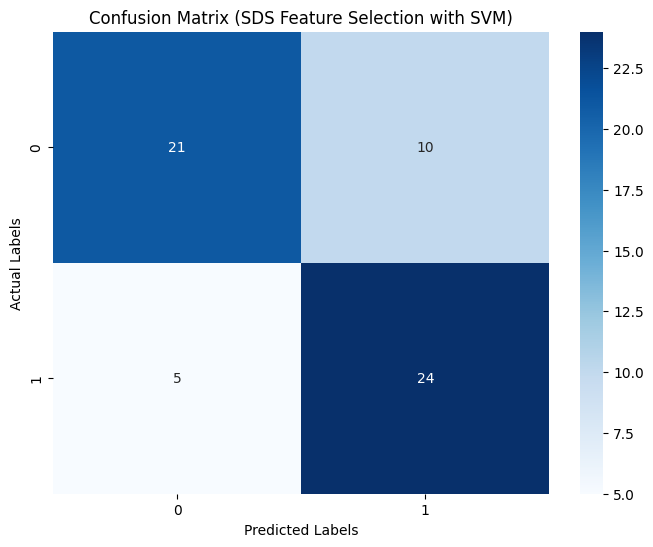


Classification Report for SDS:
              precision    recall  f1-score   support

           0       0.81      0.68      0.74        31
           1       0.71      0.83      0.76        29

    accuracy                           0.75        60
   macro avg       0.76      0.75      0.75        60
weighted avg       0.76      0.75      0.75        60

AUC ROC Score for SDS: 0.8554
Number of features selected by SDS: 12


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

class SDS:
    def __init__(self, n_agents, n_iterations, model):
        self.n_agents = n_agents
        self.n_iterations = n_iterations
        self.model = model
        self.best_feature_subset = None
        self.best_accuracy = 0.0

    def initialize_agents(self, n_features):
        agents = []
        for _ in range(self.n_agents):
            agent_features = np.random.choice([0, 1], size=n_features)
            agents.append(agent_features)
        return np.array(agents)

    def evaluate(self, agent_features, X, y):
        selected_features = np.where(agent_features == 1)[0]
        if len(selected_features) == 0:
            return 0.0
        X_selected = X[:, selected_features]
        self.model.fit(X_selected, y)
        predictions = self.model.predict(X_selected)
        return accuracy_score(y, predictions)

    def search(self, X_train, y_train):
        n_features = X_train.shape[1]
        agents = self.initialize_agents(n_features)

        for iteration in range(self.n_iterations):
            print(f"Iteration {iteration + 1}/{self.n_iterations}")

            for i, agent in enumerate(agents):
                agent_accuracy = self.evaluate(agent, X_train, y_train)

                if agent_accuracy > self.best_accuracy:
                    self.best_accuracy = agent_accuracy
                    self.best_feature_subset = agent.copy()
                    print(f"New best accuracy: {self.best_accuracy:.4f} with features {np.where(agent == 1)[0]}")

            # Diffuse the best feature subset
            for i in range(len(agents)):
                agents[i] = self.best_feature_subset if np.random.rand() > 0.5 else agents[i]

        print(f"Best Feature Subset: {np.where(self.best_feature_subset == 1)[0]}")
        return self.best_feature_subset


if __name__ == "__main__":
    from sklearn.datasets import make_classification
    from sklearn.model_selection import train_test_split

    # Generate a synthetic dataset
    X, y = make_classification(n_samples=200, n_features=20, n_informative=15, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize SVM model
    svm_model = SVC(kernel='rbf', probability=True, random_state=42)

    # Initialize SDS with SVM
    sds = SDS(n_agents=10, n_iterations=20, model=svm_model)

    # Perform feature selection using SDS
    best_features = sds.search(X_train, y_train)

    # Save the number of selected features
    num_features_sds = np.sum(best_features)

    # Filter the features based on the best features selected by SDS
    selected_features = np.where(best_features == 1)[0]
    X_train_sds = X_train[:, selected_features]
    X_test_sds = X_test[:, selected_features]

    # Train the SVM model using the selected features
    svm_model.fit(X_train_sds, y_train)

    # Make predictions
    y_pred_sds = svm_model.predict(X_test_sds)

    # Calculate accuracy
    sds_accuracy = accuracy_score(y_test, y_pred_sds)
    print(f"Accuracy using SDS selected features: {sds_accuracy:.4f}")

    # 1. Confusion Matrix
    conf_matrix_sds = confusion_matrix(y_test, y_pred_sds)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_sds, annot=True, fmt='d', cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
    plt.title("Confusion Matrix (SDS Feature Selection with SVM)")
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.show()

    # 2. Classification Report
    print("\nClassification Report for SDS:")
    print(classification_report(y_test, y_pred_sds))

    # Calculate AUC ROC score for SDS model
    try:
        aucroc_sds = roc_auc_score(y_test, svm_model.predict_proba(X_test_sds)[:, 1])
        print(f"AUC ROC Score for SDS: {aucroc_sds:.4f}")
    except Exception as e:
        aucroc_sds = None
        print(f"Error calculating AUC ROC for SDS: {e}")

    # Print the number of features selected
    print(f"Number of features selected by SDS: {num_features_sds}")


## Applying Principal Component Analysis (PCA)

Running PCA...
Accuracy using PCA-reduced features: 0.8667


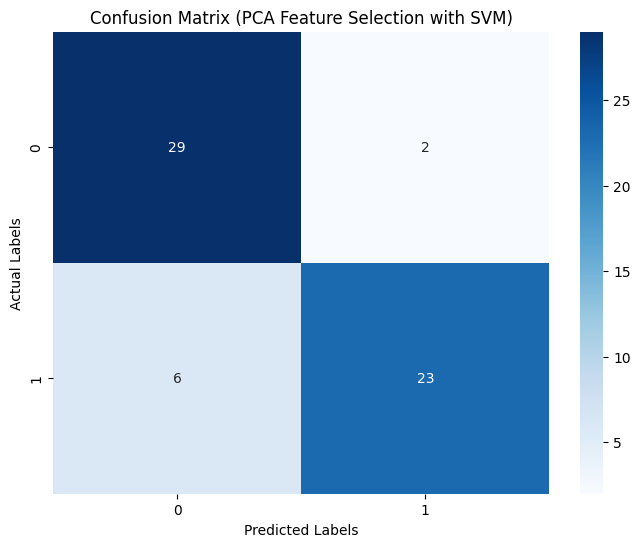


Classification Report for PCA with SVM:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        31
           1       0.92      0.79      0.85        29

    accuracy                           0.87        60
   macro avg       0.87      0.86      0.87        60
weighted avg       0.87      0.87      0.87        60

AUC ROC Score (Binary): 0.9333
Number of features after PCA: 20


In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Running PCA for Dimensionality Reduction
print("Running PCA...")
n_components = min(20, X_train.shape[1])  # Adjust to fit the dataset
pca = PCA(n_components=n_components)  # Reduce to n_components principal components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Save the number of features after PCA
num_features_pca = X_train_pca.shape[1]

# Train the SVM model using PCA-transformed data
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_pca, y_train)

# Make predictions
pca_predictions = svm_model.predict(X_test_pca)

# Calculate accuracy
pca_accuracy = accuracy_score(y_test, pca_predictions)
print(f"Accuracy using PCA-reduced features: {pca_accuracy:.4f}")

# Store accuracy in the results dictionary
accuracy_results = {
    'PCA': {
        'Accuracy': pca_accuracy
    }
}

# 1. Confusion Matrix (with counts)
conf_matrix_pca = confusion_matrix(y_test, pca_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_pca, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix (PCA Feature Selection with SVM)")
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

# 2. Classification Report
print("\nClassification Report for PCA with SVM:")
print(classification_report(y_test, pca_predictions))

# 3. AUC ROC (if applicable for multiclass)
try:
    if len(np.unique(y_test)) > 2:  # AUC is for binary or multiclass problems
        auc_score_pca = roc_auc_score(y_test, svm_model.predict_proba(X_test_pca), multi_class='ovr', average='weighted')
        aucroc_results = {'PCA': auc_score_pca}  # Store AUC ROC score in results dictionary
        print(f"AUC ROC Score: {auc_score_pca:.4f}")
    else:
        # For binary classification, we can calculate AUC directly using the positive class probability
        auc_score_pca = roc_auc_score(y_test, svm_model.predict_proba(X_test_pca)[:, 1])
        aucroc_results = {'PCA': auc_score_pca}  # Store AUC ROC score in results dictionary
        print(f"AUC ROC Score (Binary): {auc_score_pca:.4f}")
except Exception as e:
    aucroc_results = {'PCA': None}
    print(f"Error calculating AUC: {e}")

# Display the number of features after PCA
print(f"Number of features after PCA: {num_features_pca}")


## Applying Recursive Feature Elimination (RFE)

Running RFE with SVM...


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=50 > n_features=20. There will be no feature selection and all features will be kept.
  warnings.warn(


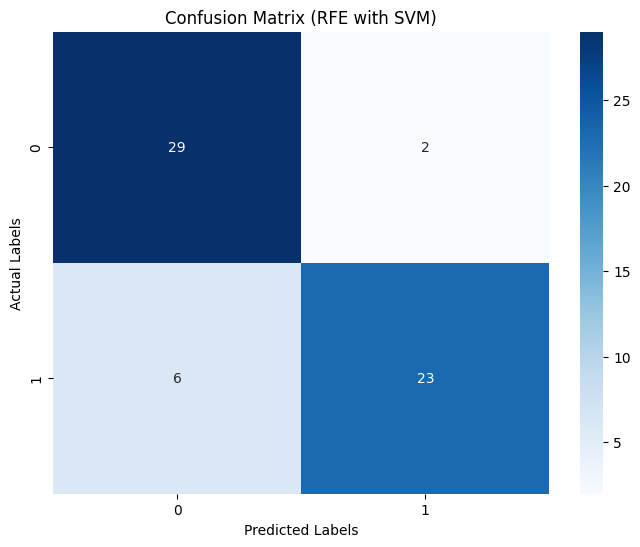


Classification Report for RFE with SVM:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        31
           1       0.92      0.79      0.85        29

    accuracy                           0.87        60
   macro avg       0.87      0.86      0.87        60
weighted avg       0.87      0.87      0.87        60

AUC ROC Score (Binary): 0.9333
Number of features selected by RFE: 20


In [ ]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. RFE Feature Selection with SVM
print("Running RFE with SVM...")

# Initialize the SVM model with RBF kernel
svm_model = SVC(kernel='rbf', C=1.0, probability=True, random_state=42)

# Selecting top 50 features, as an example
n_features_to_select = 50
rfe = RFE(estimator=svm_model, n_features_to_select=n_features_to_select, step=1)

# Perform RFE on the training data
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Save the number of features selected by RFE
num_features_rfe = X_train_rfe.shape[1]

# Train the SVM model with selected features from RFE
svm_model.fit(X_train_rfe, y_train)
rfe_predictions = svm_model.predict(X_test_rfe)

# Calculate accuracy
rfe_accuracy = accuracy_score(y_test, rfe_predictions)

# Store results in a dictionary
accuracy_results = {
    'RFE': {
        'Accuracy': rfe_accuracy,
    }
}

# 2. Confusion Matrix (with counts)
conf_matrix = confusion_matrix(y_test, rfe_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix (RFE with SVM)")
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

# 3. Classification Report
print("\nClassification Report for RFE with SVM:")
print(classification_report(y_test, rfe_predictions))

# 4. AUC ROC (if applicable for multiclass)
try:
    if len(np.unique(y_test)) > 2:  # AUC is for multiclass problems
        auc_score = roc_auc_score(y_test, svm_model.predict_proba(X_test_rfe), multi_class='ovr', average='weighted')
        print(f"AUC ROC Score: {auc_score:.4f}")
        aucroc_results = {'RFE': auc_score}
    else:
        # For binary classification, calculate AUC directly using the positive class probability
        auc_score = roc_auc_score(y_test, svm_model.predict_proba(X_test_rfe)[:, 1])
        print(f"AUC ROC Score (Binary): {auc_score:.4f}")
        aucroc_results = {'RFE': auc_score}
except Exception as e:
    print(f"Error calculating AUC: {e}")
    aucroc_results = {'RFE': None}

# Display the number of features selected by RFE
print(f"Number of features selected by RFE: {num_features_rfe}")


## Mutual Information

Running Mutual Information with SVM...
Mutual Information Accuracy: 0.8667
AUC ROC Score: 0.9333
Number of features selected by Mutual Information: 20


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:779: UserWarning: k=50 is greater than n_features=20. All the features will be returned.
  warnings.warn(


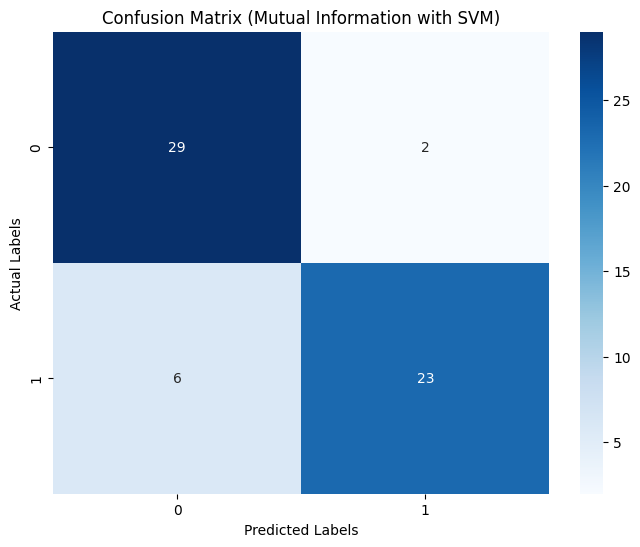


Classification Report for Mutual Information with SVM:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        31
           1       0.92      0.79      0.85        29

    accuracy                           0.87        60
   macro avg       0.87      0.86      0.87        60
weighted avg       0.87      0.87      0.87        60



In [ ]:
from sklearn.svm import SVC
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Mutual Information Feature Selection
print("Running Mutual Information with SVM...")
num_features = 50  # Adjust based on your requirement
mi_selector = SelectKBest(score_func=mutual_info_classif, k=num_features)

# Select top features using Mutual Information
X_train_mi = mi_selector.fit_transform(X_train, y_train)
X_test_mi = mi_selector.transform(X_test)

# Save the number of features selected
num_features_mi = X_train_mi.shape[1]

# Initialize the SVM model with RBF kernel
svm_model = SVC(kernel='rbf', C=1.0, probability=True, random_state=42)

# Train the SVM model using Mutual Information selected features
svm_model.fit(X_train_mi, y_train)

# Make predictions
mi_predictions = svm_model.predict(X_test_mi)

# Calculate accuracy
mi_accuracy = accuracy_score(y_test, mi_predictions)
accuracy_results = {'Mutual Information': mi_accuracy}

# Calculate AUC-ROC for Mutual Information Model
def calculate_auc_roc(model, X_test, y_test):
    try:
        # If it's a multiclass problem, compute AUC for each class using One-vs-Rest (OvR)
        if len(np.unique(y_test)) > 2:
            return roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr', average='weighted')
        else:
            # For binary classification, calculate AUC using probabilities for the positive class
            return roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    except Exception as e:
        print(f"Error calculating AUC-ROC: {e}")
        return None

# Store the AUC ROC score in the results dictionary
aucroc_results = {}
aucroc_results['Mutual Information'] = calculate_auc_roc(svm_model, X_test_mi, y_test)

# Print the results
print(f"Mutual Information Accuracy: {mi_accuracy:.4f}")
if aucroc_results['Mutual Information'] is not None:
    print(f"AUC ROC Score: {aucroc_results['Mutual Information']:.4f}")

# Print the number of features selected
print(f"Number of features selected by Mutual Information: {num_features_mi}")

# 2. Confusion Matrix
conf_matrix = confusion_matrix(y_test, mi_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix (Mutual Information with SVM)")
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

# 3. Classification Report
print("\nClassification Report for Mutual Information with SVM:")
print(classification_report(y_test, mi_predictions))


# **Model Comparison**

In [ ]:
import plotly.graph_objects as go

# Baseline model accuracies and features
baseline_accuracy_percentage = baseline_accuracy * 100  # Convert to percentage
baseline_features = num_features_baseline  # Total features before any feature selection

# SDS model accuracies and features
sds_accuracy_percentage = sds_accuracy * 100  # Convert to percentage
sds_features = np.sum(best_features)  # Number of features selected by SDS

# RFE model accuracies and features
rfe_accuracy_percentage = rfe_accuracy * 100  # Convert to percentage
rfe_features = X_train_rfe.shape[1]  # Number of features selected by RFE

# PCA model accuracies and features
pca_accuracy_percentage = pca_accuracy * 100  # Convert to percentage
pca_features = X_train_pca.shape[1]  # Number of features after PCA

# Mutual Information (MI) model accuracies and features
mi_accuracy_percentage = mi_accuracy * 100  # Convert to percentage
mi_features = num_features_mi  # Number of features selected by Mutual Information

# Compile all the data into a dictionary for easier comparison
model_performances = {
    'Baseline': {'Accuracy (%)': baseline_accuracy_percentage, 'Number of Features': baseline_features},
    'SDS': {'Accuracy (%)': sds_accuracy_percentage, 'Number of Features': sds_features},
    'PCA': {'Accuracy (%)': pca_accuracy_percentage, 'Number of Features': pca_features},
    'RFE': {'Accuracy (%)': rfe_accuracy_percentage, 'Number of Features': rfe_features},
    'Mutual Information': {'Accuracy (%)': mi_accuracy_percentage, 'Number of Features': mi_features},
}

# Display the comparison in a formatted way
print("Model Performance Comparison:")
for model_name, metrics in model_performances.items():
    print(f"{model_name} Model: Accuracy = {metrics['Accuracy (%)']:.2f}%, Features Used = {metrics['Number of Features']}")

# Create Plotly Visualization
# Create traces
fig = go.Figure()

# Add bar chart for Accuracy
fig.add_trace(go.Bar(
    x=list(model_performances.keys()),
    y=[data['Accuracy (%)'] for data in model_performances.values()],
    name='Accuracy (%)',
    marker_color=["#FF7F0E", "#1F77B4", "#2CA02C", "#D62728", "#9467BD"]
))

# Add line chart for Number of Features
fig.add_trace(go.Scatter(
    x=list(model_performances.keys()),
    y=[data['Number of Features'] for data in model_performances.values()],
    name='Number of Features',
    mode='lines+markers',
    line=dict(color='lightblue', width=3),
    marker=dict(size=8, color='blue')
))

# Layout adjustments
fig.update_layout(
    title="Comparison of Model Performances",
    xaxis=dict(title='Model'),
    yaxis=dict(
        title='Accuracy (%)',
        range=[0, 100]  # Set range for Accuracy in percentage
    ),
    yaxis2=dict(
        title='Number of Features',
        overlaying='y',
        side="right",
        showgrid=False  # Hide secondary grid
    ),
    legend=dict(
        x=1.03,  # Legend outside the graph
        y=1.3,
        xanchor="left",
        yanchor="top",
        bordercolor="Black",
        borderwidth=1
    ),
    template='plotly_white',  # Clean white background
    margin=dict(r=200)  # Adjust right margin for legend
)

# Show plot
fig.show()


Model Performance Comparison:
Baseline Model: Accuracy = 65.33%, Features Used = 10000
SDS Model: Accuracy = 75.00%, Features Used = 12
PCA Model: Accuracy = 78.33%, Features Used = 20
RFE Model: Accuracy = 86.67%, Features Used = 20
Mutual Information Model: Accuracy = 86.67%, Features Used = 20


In [ ]:
import plotly.graph_objects as go
import numpy as np

# Baseline model accuracies and features
baseline_accuracy_percentage = baseline_accuracy * 100  # Convert to percentage
baseline_features = num_features_baseline  # Total features before any feature selection

# SDS model accuracies and features
sds_accuracy_percentage = sds_accuracy * 100  # Convert to percentage
sds_features = np.sum(best_features)  # Number of features selected by SDS

# RFE model accuracies and features
rfe_accuracy_percentage = rfe_accuracy * 100  # Convert to percentage
rfe_features = X_train_rfe.shape[1]  # Number of features selected by RFE

# PCA model accuracies and features
pca_accuracy_percentage = pca_accuracy * 100  # Convert to percentage
pca_features = X_train_pca.shape[1]  # Number of features after PCA

# Mutual Information (MI) model accuracies and features
mi_accuracy_percentage = mi_accuracy * 100  # Convert to percentage
mi_features = num_features_mi  # Number of features selected by Mutual Information

# Compile all the data into a dictionary for easier comparison
model_performances = {
    'Baseline': {'Accuracy (%)': baseline_accuracy_percentage, 'Number of Features': baseline_features},
    'SDS': {'Accuracy (%)': sds_accuracy_percentage, 'Number of Features': sds_features},
    'PCA': {'Accuracy (%)': pca_accuracy_percentage, 'Number of Features': pca_features},
    'RFE': {'Accuracy (%)': rfe_accuracy_percentage, 'Number of Features': rfe_features},
    'Mutual Information': {'Accuracy (%)': mi_accuracy_percentage, 'Number of Features': mi_features},
}

# Display the comparison in a formatted way
print("Model Performance Comparison:")
for model_name, metrics in model_performances.items():
    print(f"{model_name} Model: Accuracy = {metrics['Accuracy (%)']:.2f}%, Features Used = {metrics['Number of Features']}")

# Create Plotly Visualization
# Create traces
fig = go.Figure()

# Add bar chart for Accuracy
fig.add_trace(go.Bar(
    x=list(model_performances.keys()),
    y=[data['Accuracy (%)'] for data in model_performances.values()],
    name='Accuracy (%)',
    marker_color=["#FF7F0E", "#1F77B4", "#2CA02C", "#D62728", "#9467BD"]
))

# Add line chart for Number of Features with a logarithmic scale
fig.add_trace(go.Scatter(
    x=list(model_performances.keys()),
    y=[data['Number of Features'] for data in model_performances.values()],
    name='Number of Features',
    mode='lines+markers',
    line=dict(color='lightblue', width=3),
    marker=dict(size=8, color='blue'),
    yaxis='y2'
))

# Layout adjustments with increased graph size and logarithmic secondary y-axis
fig.update_layout(
    title="Comparison of Model Performances",
    xaxis=dict(title='Model'),
    yaxis=dict(
        title='Accuracy (%)',
        range=[0, 100]  # Set range for Accuracy in percentage
    ),
    yaxis2=dict(
        title='Number of Features (Log Scale)',
        type='log',  # Logarithmic scale
        overlaying='y',
        side="right",
        showgrid=False  # Hide secondary grid
    ),
    legend=dict(
        x=1.03,  # Legend outside the graph
        y=1.3,
        xanchor="left",
        yanchor="top",
        bordercolor="Black",
        borderwidth=1
    ),
    template='plotly_white',  # Clean white background
    width=1200,  # Increase the width of the graph
    height=800,  # Increase the height of the graph
    margin=dict(l=80, r=200, t=80, b=80)  # Adjust margins for better spacing
)

# Show plot
fig.show()


Model Performance Comparison:
Baseline Model: Accuracy = 65.33%, Features Used = 10000
SDS Model: Accuracy = 75.00%, Features Used = 12
PCA Model: Accuracy = 78.33%, Features Used = 20
RFE Model: Accuracy = 86.67%, Features Used = 20
Mutual Information Model: Accuracy = 86.67%, Features Used = 20
